# Create a Hertzsprung-Russel diagram from Gaia DR2

## Hertzsprung-Russel

In 1910 Ejnar Hertzsprung and Henry Norris Russell created a scatter plot which shows the relationship between a star's absolute magnitude (or brightness, luminosity) and temperature (or colour). The diagram is one of the major astronomical insights of the early 20th century and visualises stellar evolution. It shows stellar types, like white dwarfs or red giants, on the evolutionary scale.

The diagram shows the main sequence running from roughly top left to bottom right. The main sequence is the stage where stars fuse hydrogen in their cores. Our sun is one such star, halfway on the main sequence and halfway it's lifespan of about 5 billion years. Top right are the red giants: huge reddish stars. And left below the main sequence are white dwarfs. The huge and hot supergiants are all the way to the left of the main sequence.

The HR Diagram has many uses. One of them is to estimate the distance to a star cluster. The colour and relative magnitude are observed and through the parallax the distance then can be deduced.

The HR Diagram (HRD) used to be based on thousands of stars from spectroscopic surveys were originally taken from the Hendry Draper Catalog. But now there's the Gaia Data Release 2 with data on give or take 1.7 billion stars! Of about 80 million stars the luminosity is measured and those can be used to create our own HR Diagram.

Let's go!

First we need to import the modules we need to pull this off. Obviously we will use pandas and pyplot. You can ofcourse make your own version using another scatter plot module.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import glob

Now, the Gaia Data Release 2 consists of many csv files. We're not going to load in all of them. Instead, head over to the Gaia repository and download a random bunch of them (I downloaded about 25).

http://cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source/csv/

There's lots more to see and read on the Gaia website. Make sure to check the data model and read some on how the measurements were done.

I chose to go for the easy way out and just have a data folder containing the csv files and then read all of them into a pandas dataframe. Obviously you have to set the data_folder variable to whatever location you are using.

In [2]:
# set input file path
data_folder = '../GaiaHR/files/'

Load in all the csv files in the data_folder using a lambda function (basically a for loop in a one-liner):

In [3]:
# read csv into dataframe using a lambda function
dfraw = pd.concat([pd.read_csv(f) for f in glob.glob(data_folder+'*.csv')], ignore_index = True)

Now, the columns we need are just two: 'lum_val' containing the luminosities and 'astrometric_pseudo_colour' containing the calculated colours. Beware that both of these values aren't that precise. The description of the dataset doesn't tell you this but if you read up on how they calculate the pseudo colour you'll be surprised what's also in there. Like entire galaxies or artifacts. We are not going to clean those out here, it's way too hard for this easy excercise. But we are ditching al rows with a NaN-value in either column. I chose a numpy isinfinite function for this.

In [4]:
# clean up NaN values (it's a bit nasty to do it this way but hey! I'm still a beginner)
gaiaHR = dfraw[np.isfinite(dfraw['lum_val'])]
gaiaHR = dfraw[np.isfinite(dfraw['astrometric_pseudo_colour'])]
print(gaiaHR.shape)

(421889, 94)


We now have a gaiaHR pandas dataframe with only actual values in them. Let's create the scatter plot! First we set the axis:

In [5]:
x = gaiaHR['astrometric_pseudo_colour']
y = gaiaHR['lum_val']

And then sprinkle the sauce to present this in a nice way using several matplotlib.pyplot functions. Note the scale is logarithmic. In the dataset some values are a bit off the scale so using xlim max and min we correct for this. To me it is a matter of principle not to remove them from the dataset as I actually don't know if they are outliers or not. They did however mess up my cmap so I ditched them ^_^

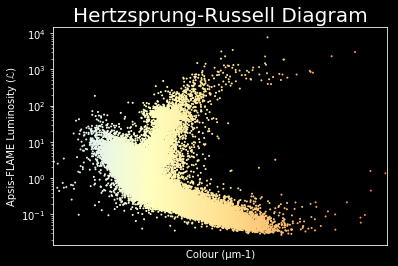

In [6]:
plt.style.use('dark_background')
plt.yscale('log')
plt.xscale('log')
plt.title('Hertzsprung-Russell Diagram',fontsize=20)
plt.xlabel('Colour (μm-1)')
plt.ylabel('Apsis-FLAME Luminosity (ℒ)')
plt.scatter(x, y, s=1, c=x ,cmap=plt.get_cmap('RdYlBu'))
plt.xlim(xmax=1.8)
plt.xlim(xmin=1.1)
plt.gca().invert_xaxis()
plt.show()

With about 500.000 datapoints the calculation takes about 13 seconds on my 2017 Macbook Air (i5 1.8Ghz & 8GiB memory).
In theory you should be able to read in all 80 million possible datapoints for this HR Diagram. Depending on your machine it should take a long break. But it's doable.

Now, this HR Diagram is by no means of top quality. I am not sure why the blue and hot stars aren't in the diagram. For me it is no problem as I just wanted to make this HR Diagram as a first real life scatter plot.

Feel free to adapt on it!

****Citation

This work has made use of data from the European Space Agency (ESA) mission Gaia (https://www.cosmos.esa.int/gaia), processed by the Gaia Data Processing and Analysis Consortium (DPAC, https://www.cosmos.esa.int/web/gaia/dpac/consortium). Funding for the DPAC has been provided by national institutions, in particular the institutions participating in the Gaia Multilateral Agreement.